### Import the packages

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import string
import cv2
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

In [2]:
print(os.listdir("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/"))
dim = 100

['Testing', 'Training']


In [3]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Testing']
    if not k_fold:
        path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , tomatoes[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Training/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

### Training data

#### Initialize the tomatoes for training data

In [4]:
tomatoes=['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Training', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Testing', print_n=True, k_fold=False)

['Mobile_captured_red_tomatoes', 'Mobile_captured_green_tomatoes']
There are  100   TRAINING  images of  MOBILE_CAPTURED_RED_TOMATOES
There are  100   TRAINING  images of  MOBILE_CAPTURED_GREEN_TOMATOES
There are  100   TESTING  images of  MOBILE_CAPTURED_RED_TOMATOES
There are  100   TESTING  images of  MOBILE_CAPTURED_GREEN_TOMATOES


#### Use K-fold for training data

In [5]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

#### Scaling the images using Standard Scaler for training data

In [6]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15,15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axes[i, j].axis('off')
            axes[i, j].imshow(images[n])
            n += 1   

### 1) Trained Mobile Captured Red Tomatoes

Mobile_captured_red_tomatoes


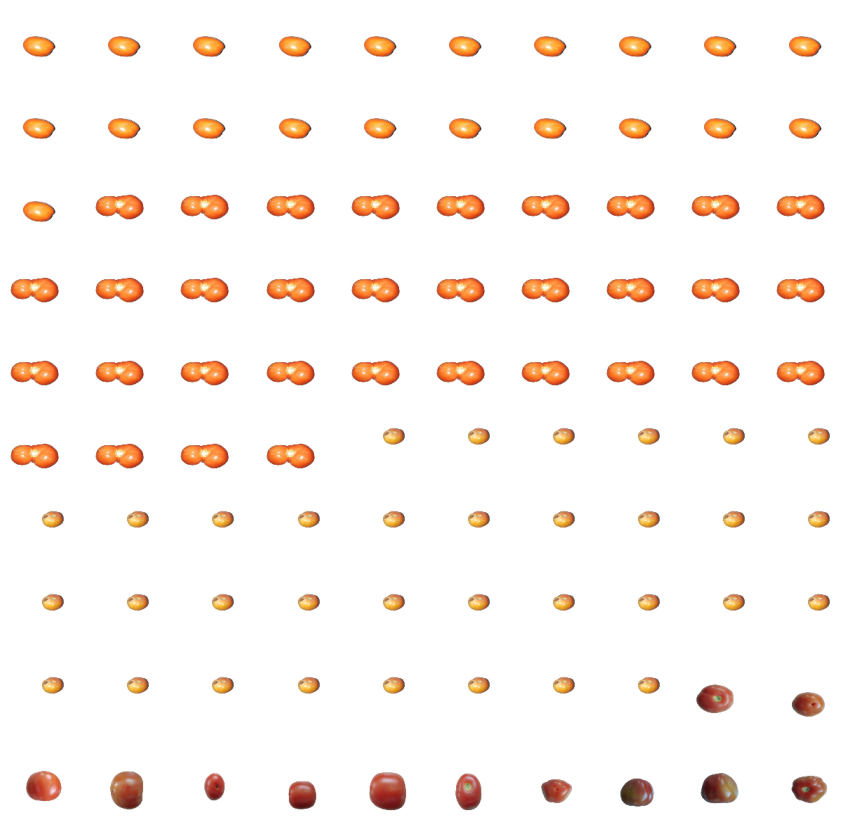

In [8]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:100], 10, 10)

### 2) Trained Mobile Captured Green Tomatoes

Mobile_captured_green_tomatoes


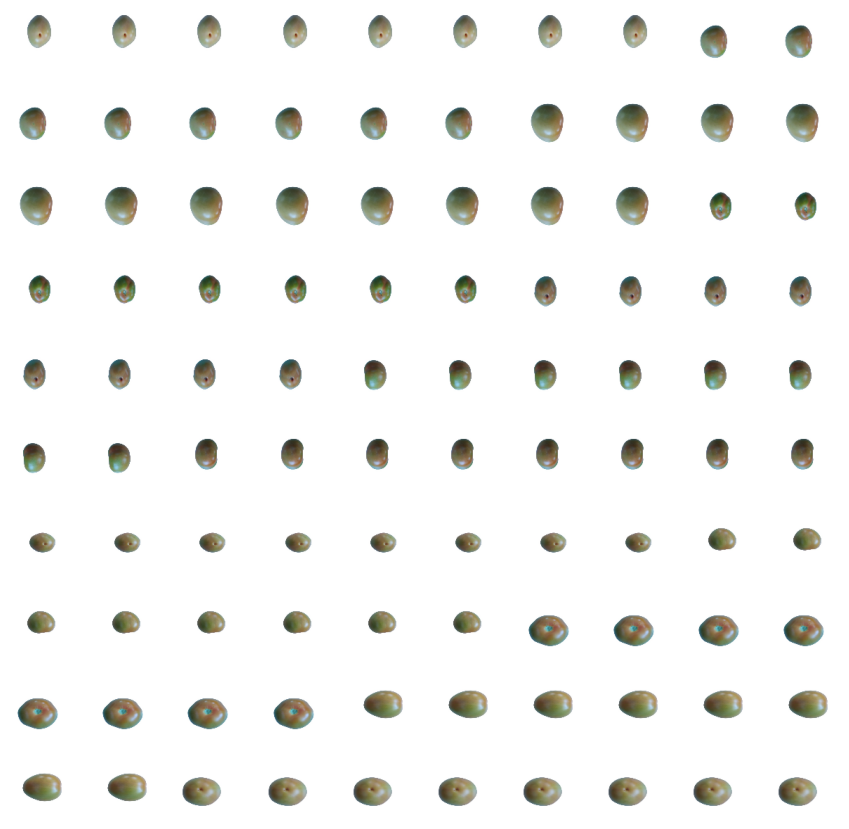

In [9]:
print(tomatoes[y_train[100]])
plot_image_grid(X_train[100:200], 10, 10)

### 1) Using Linear SVM for Classification on trained data

##### Define the model and evaluate all the metrics

####  Multi-class classification

In [10]:
tomatoes = ['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Training')
X_test, y_test = getTomatoes(tomatoes, 'Testing')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

In [11]:
# Linear SVM
model = SVC(gamma='scale', kernel='linear',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Accuracy with Linear SVM = 100.0%
Precision with Linear SVM = 100.0%
Recall with Linear SVM = 100.0%
F1_score with Linear SVM = 100.0%


col_0,0,1
row_0,,
0,100,0
1,0,100


### 2) Kernel RBF SVM for trained data

In [12]:
# Kernel RBF SVM
model = SVC(gamma='scale', kernel='rbf',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Accuracy with Kernel RBF SVM = 100.0%
Precision with Kernel RBF SVM = 100.0%
Recall with Kernel RBF SVM = 100.0%
F1_score with Kernel RBF SVM = 100.0%


col_0,0,1
row_0,,
0,100,0
1,0,100


### 3) KNN for trained data

In [13]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
model.fit(X_train, y) 
y_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with K-NN = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with K-NN = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with K-NN = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with K-NN = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Accuracy with K-NN = 97.0%
Precision with K-NN = 97.2%
Recall with K-NN = 97.0%
F1_score with K-NN = 97.0%


col_0,0,1
row_0,,
0,94,0
1,6,100


### 4) Using PCA for SVM for trained data

In [14]:
pca = PCA(n_components=2)
# Convert the X_train data into 2D
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.fit_transform(X_test)

In [15]:
# Linear SVM
model = SVC(gamma='scale', kernel='linear',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Linear SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Linear SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Linear SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Linear SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Accuracy with Linear SVM after PCA = 96.5%
Precision with Linear SVM after PCA = 96.7%
Recall with Linear SVM after PCA = 96.5%
F1_score with Linear SVM after PCA = 96.5%


col_0,0,1
row_0,,
0,93,0
1,7,100


In [16]:
# Kernel RBF SVM
model = SVC(gamma='scale', kernel='rbf',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Accuracy with Kernel RBF SVM after PCA = 96.0%
Precision with Kernel RBF SVM after PCA = 96.3%
Recall with Kernel RBF SVM after PCA = 96.0%
F1_score with Kernel RBF SVM after PCA = 96.0%


col_0,0,1
row_0,,
0,92,0
1,8,100


### 5) Using PCA for K-NN on training data

In [17]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with K-NN after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with K-NN after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with K-NN after PCA  = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with K-NN after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Accuracy with K-NN after PCA = 98.0%
Precision with K-NN after PCA = 98.1%
Recall with K-NN after PCA  = 98.0%
F1_score with K-NN after PCA = 98.0%


col_0,0,1
row_0,,
0,96,0
1,4,100


### Testing data

In [18]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Testing']
    if not k_fold:
        path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , tomatoes[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("C://Users/Ishan.Borkar/Desktop/Tomato analysis/Kaggle/Testing/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

#### Initialize the tomatoes for testing data

In [19]:
tomatoes=['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Testing', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Training', print_n=True, k_fold=False)

['Mobile_captured_red_tomatoes', 'Mobile_captured_green_tomatoes']
There are  100   TESTING  images of  MOBILE_CAPTURED_RED_TOMATOES
There are  100   TESTING  images of  MOBILE_CAPTURED_GREEN_TOMATOES
There are  100   TRAINING  images of  MOBILE_CAPTURED_RED_TOMATOES
There are  100   TRAINING  images of  MOBILE_CAPTURED_GREEN_TOMATOES


#### Use k-fold for testing data

In [20]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

#### Using standard scalar for testing data

In [21]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 1) Tested Mobile Captured Red tomatoes

Mobile_captured_red_tomatoes


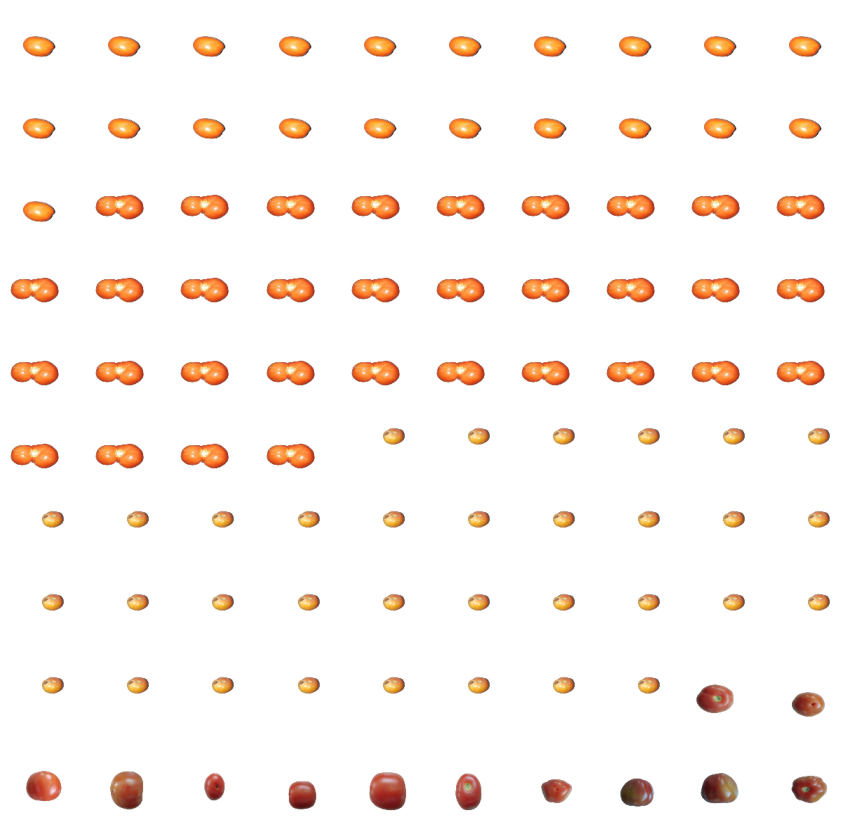

In [22]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:100], 10, 10)

### 2) Tested Mobile Captured Green tomatoes 

Mobile_captured_green_tomatoes


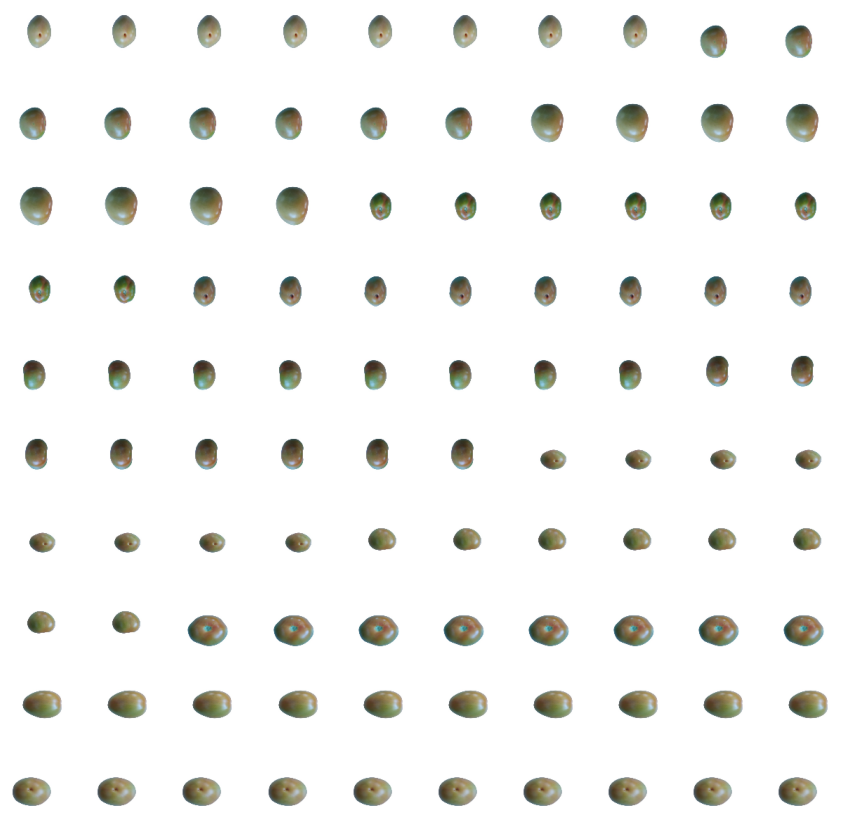

In [23]:
print(tomatoes[y_train[100]])
plot_image_grid(X_train[100:200], 10, 10)

### Multiclass classification for testing data

In [24]:
tomatoes = ['Mobile_captured_red_tomatoes','Mobile_captured_green_tomatoes']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Testing')
X_test, y_test = getTomatoes(tomatoes, 'Training')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

### 1) Using SVM for testing data

In [25]:
# Linear SVM
model = SVC(gamma='scale', kernel='linear',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Accuracy with Linear SVM = 100.0%
Precision with Linear SVM = 100.0%
Recall with Linear SVM = 100.0%
F1_score with Linear SVM = 100.0%


col_0,0,1
row_0,,
0,100,0
1,0,100


In [26]:
# Kernel RBF SVM
model = SVC(gamma='scale', kernel='rbf',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Accuracy with Kernel RBF SVM = 100.0%
Precision with Kernel RBF SVM = 100.0%
Recall with Kernel RBF SVM = 100.0%
F1_score with Kernel RBF SVM = 100.0%


col_0,0,1
row_0,,
0,100,0
1,0,100


### 2) Using K-NN for testing data 

In [27]:
# K-NN
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
model.fit(X_train, y) 
y_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with K-NN = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with K-NN = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with K-NN = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with K-NN = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Accuracy with K-NN = 97.0%
Precision with K-NN = 97.2%
Recall with K-NN = 97.0%
F1_score with K-NN = 97.0%


col_0,0,1
row_0,,
0,94,0
1,6,100


### 3) Using PCA for SVM on testing data

In [28]:
pca = PCA(n_components=2)
# Convert the X_train data into 2D
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.fit_transform(X_test)

In [29]:
# Linear SVM
model = SVC(gamma='scale', kernel='linear',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Linear SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Linear SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Linear SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Linear SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Accuracy with Linear SVM after PCA = 96.0%
Precision with Linear SVM after PCA = 96.3%
Recall with Linear SVM after PCA = 96.0%
F1_score with Linear SVM after PCA = 96.0%


col_0,0,1
row_0,,
0,92,0
1,8,100


In [30]:
# Kernel RBF SVM
model = SVC(gamma='scale', kernel='rbf',probability=True)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Accuracy with Kernel RBF SVM after PCA = 95.5%
Precision with Kernel RBF SVM after PCA = 95.9%
Recall with Kernel RBF SVM after PCA = 95.5%
F1_score with Kernel RBF SVM after PCA = 95.5%


col_0,0,1
row_0,,
0,91,0
1,9,100


### 4) Using PCA for K-NN on testing data

In [31]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with K-NN after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with K-NN after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with K-NN after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with K-NN after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Accuracy with K-NN after PCA = 98.0%
Precision with K-NN after PCA = 98.1%
Recall with K-NN after PCA = 98.0%
F1_score with K-NN after PCA = 98.0%


col_0,0,1
row_0,,
0,96,0
1,4,100
